In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
DATA_PATH = '../data/Environment_Temperature_change_E_All_Data_NOFLAG.csv'

In [197]:
data_frame = pd.read_csv(DATA_PATH, encoding='cp1252')
print(data_frame.shape)


(9656, 66)


In [198]:
no_rows, no_columns = data_frame.shape
no_years_columns = 2019 - 1961 + 1
no_not_years_columns = no_columns - no_years_columns
year_columns = data_frame.columns[no_columns - no_years_columns:]

In [199]:
data_frame.iloc[:10, : 10]


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403
5,2,Afghanistan,7003,March,6078,Standard Deviation,°C,1.512,1.512,1.512
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919
7,2,Afghanistan,7004,April,6078,Standard Deviation,°C,1.406,1.406,1.406
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690
9,2,Afghanistan,7005,May,6078,Standard Deviation,°C,1.230,1.230,1.230


In [200]:
data_frame.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


In [201]:
data_frame.loc[[355]].isnull().sum().sum()

59

In [202]:
null_values_list = []
for index in range(data_frame.shape[0]):
    if data_frame.loc[index].isnull().sum().sum() == no_years_columns:
        null_values_list.append(index)

In [203]:
data_frame.drop(null_values_list, inplace=True)

In [204]:
no_rows, no_columns = data_frame.shape

In [205]:
for column in year_columns:
    data_frame[column] = data_frame[column].replace(np.nan, data_frame[column].mean())

In [206]:
countries = ['Antarctica', 'Canada', 'Denmark', 'Egypt', 'Romania']

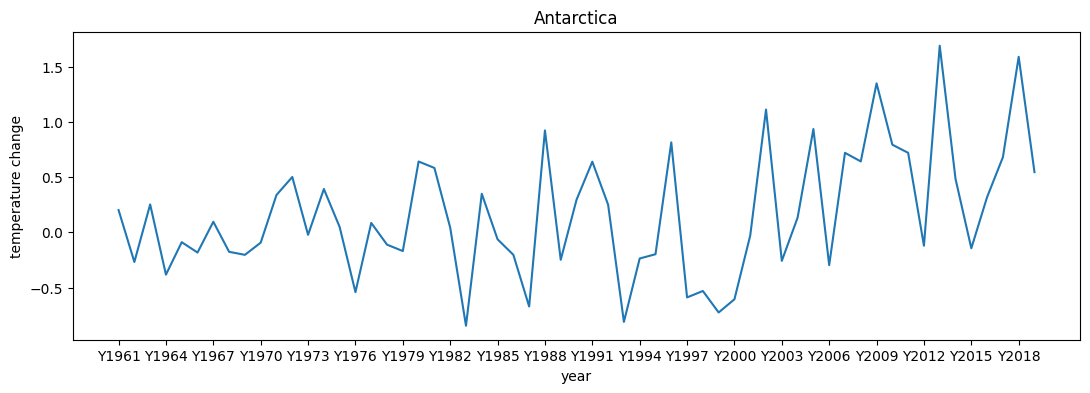

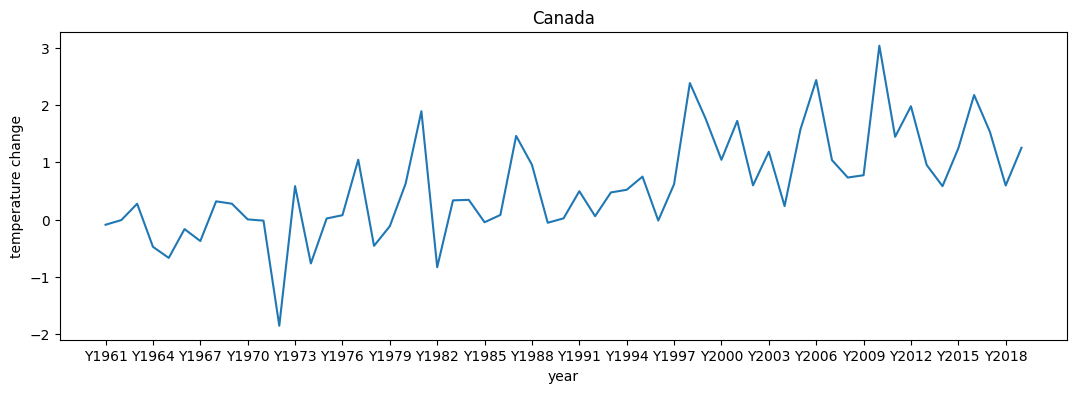

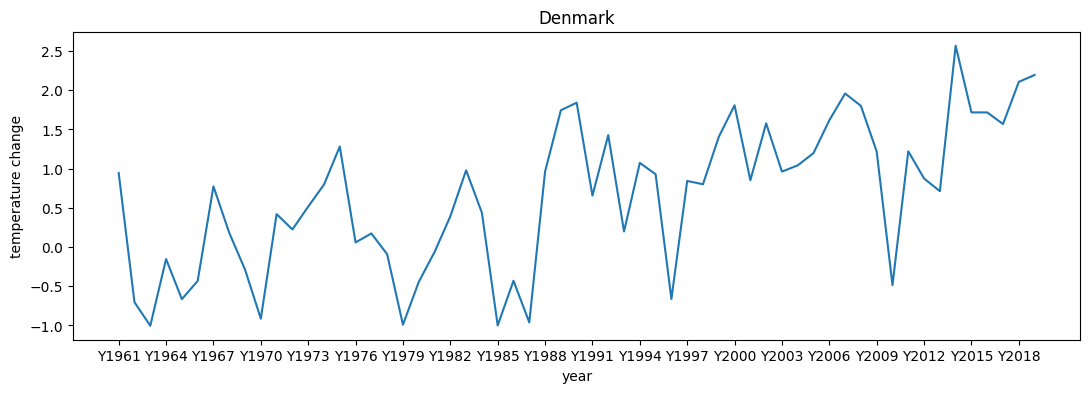

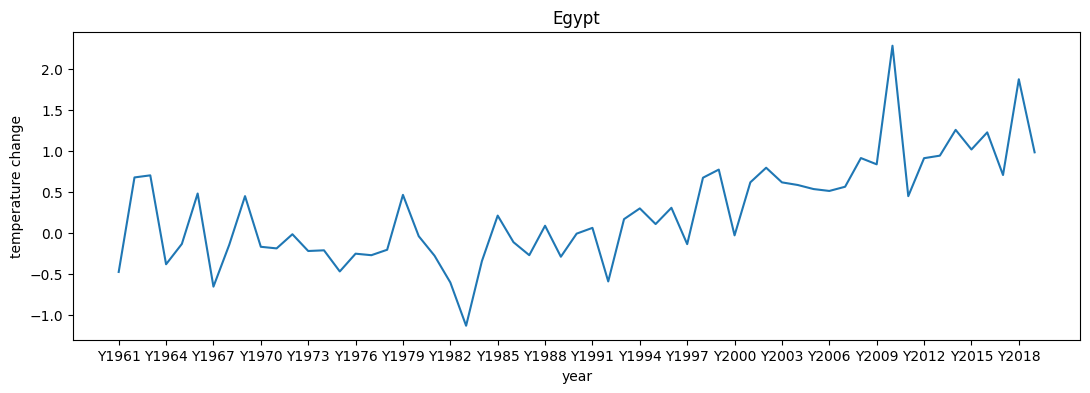

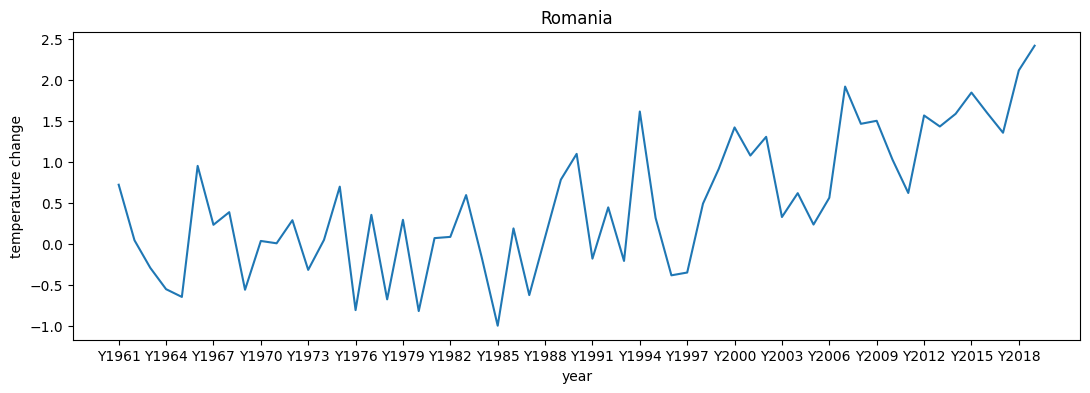

In [207]:
for country in countries:
    plt.figure(figsize=[13,4])
    df = data_frame.loc[((data_frame.Area == country) & (data_frame.Element == 'Temperature change'))]
    year_mean_temp_change = df[year_columns].mean()
    plt.plot(year_columns, year_mean_temp_change)
    plt.xlabel('year')
    plt.ylabel('temperature change')
    plt.xticks(year_columns[::3])
    plt.title(country)